In [84]:
pip install --upgrade numpy opencv-python


Note: you may need to restart the kernel to use updated packages.


In [85]:
import os
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np

In [86]:
mnist=tf.keras.datasets.mnist

In [87]:
(x_train , y_train),(x_test,y_test)=mnist.load_data()#x is image itself whereas y is the classification labels

data normalization #scaling data between 0 to 1 


In [88]:
x_train=tf.keras.utils.normalize(x_train,axis=1) #fromn utilities of keras we are using normalize to scale the data
x_test=tf.keras.utils.normalize(x_test,axis=1)
#normalizing only the pixels and not digits to make it easy for training purposes with neural networks 

In [89]:
model= tf.keras.models.Sequential()

In [90]:

#adding a flatten layer that will convert 28*28 to every single layer i.e into 784 layers 
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) 
#adding dense layer,dense layer is used to connect one neuron to another neuron of various layer
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax')) 
#output layers with relu variiant softmax that adds all the 10 output neurons to be 1 , 
#it gives probability for each digit to be the right answer 

In [91]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [92]:
model.fit(x_train,y_train, epochs=3) 
#epoch is the count of how many times the model is going to see the data over and over again

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2633 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1046 - accuracy: 0.9678
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0729 - accuracy: 0.9763


In [93]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [94]:
#till now we built the model that will recognise the digit now in the upcoming process we will use this model to test 
#we will test the model just by calling the model name everytime we need it 
model=tf.keras.models.load_model('handwritten.model')

In [95]:
loss,accuracy=model.evaluate (x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0960 - accuracy: 0.9697


In [96]:
print(loss)

0.09595540910959244


In [97]:
print(accuracy)

0.9696999788284302


1/1 [==============================] - 0s 145ms/step
digits shown is 6


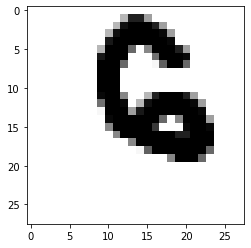

1/1 [==============================] - 0s 49ms/step
digits shown is 3


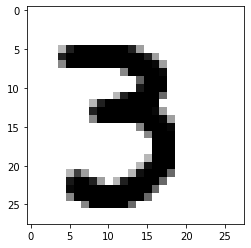

1/1 [==============================] - 0s 49ms/step
digits shown is 7


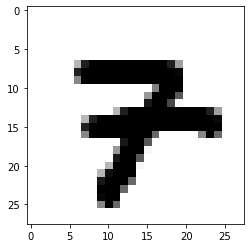

1/1 [==============================] - 0s 56ms/step
digits shown is 2


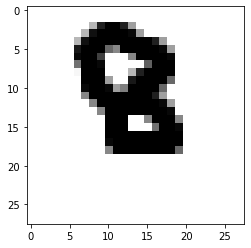

1/1 [==============================] - 0s 57ms/step
digits shown is 2


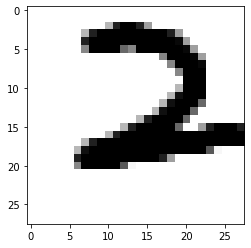

1/1 [==============================] - 0s 57ms/step
digits shown is 6


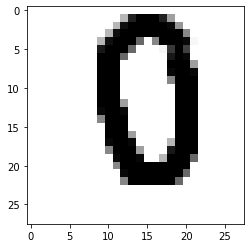

In [98]:
image_number=1
while os.path.isfile(f"Desktop\digits\dig{image_number}.png"):
    try:
        img=cv2.imread(f"Desktop\digits\dig{image_number}.png")[:,:,0]
        img=np.invert(np.array([img])) #inverting because it is white on black by default and not black on white
        prediction=model.predict(img)
        print(f"digits shown is {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally:
        image_number +=1
        